# Import 

In [79]:
import pandas as pd
# Library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Library for feature selection
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# Useful library for linear algebra functions
import numpy as np
# Library for data splitting
from sklearn.model_selection import train_test_split
# Library for performance analysis
from sklearn.metrics import accuracy_score, confusion_matrix
# import SVC classifier
from sklearn.svm import SVC
# Import package
import os
# To save to and load model from the file
import pickle

# Load Data

In [80]:
data = pd.read_excel('ML-DataSet.xlsx')

In [81]:
df = pd.DataFrame(data)

In [82]:
# check for missing values in variables
noOfNullValue = df.isnull().sum()
noOfNullValue

f_id                                0
part1_country                       0
Locality_first                      0
part1_current_preg_first            0
Anxietyrec1                      2474
Anxietyrec2                      2474
Anxietyrec3                      1975
Anxietyrec4                      1974
Anxietyrec5                      1976
Anxietyrec6                      1982
Anxietyrec7                      1975
DepressionRec1                   1985
DepressionRec2                   1990
DepressionRec3                   1988
DepressionRec4                   1984
DepressionRec5                   1983
DepressionRec6                   1984
DepressionRec7                   1987
DepressionRec8                   1989
Depressionec9                    1987
GAD_7_Anxiety_score_Cat_first    1855
PHQ_9_Depression_Score_first     1968
AnxietyCat_first                 1855
DepressionCat_first              1968
WomenAge                            0
MariageAge                          0
NumberofPreg

In [83]:
#Repalce NaN with zero on all columns 
df2 = df.fillna(0)
df2.isnull().sum()

f_id                             0
part1_country                    0
Locality_first                   0
part1_current_preg_first         0
Anxietyrec1                      0
Anxietyrec2                      0
Anxietyrec3                      0
Anxietyrec4                      0
Anxietyrec5                      0
Anxietyrec6                      0
Anxietyrec7                      0
DepressionRec1                   0
DepressionRec2                   0
DepressionRec3                   0
DepressionRec4                   0
DepressionRec5                   0
DepressionRec6                   0
DepressionRec7                   0
DepressionRec8                   0
Depressionec9                    0
GAD_7_Anxiety_score_Cat_first    0
PHQ_9_Depression_Score_first     0
AnxietyCat_first                 0
DepressionCat_first              0
WomenAge                         0
MariageAge                       0
NumberofPregnancy                0
NumberofAbortions                0
EducationLevel      

In [84]:
df2.drop(columns=['f_id','part1_country','Locality_first', 'Anxietyrec1', 'Anxietyrec2', 'Anxietyrec3', 'Anxietyrec4', 'Anxietyrec5', 'Anxietyrec6', 'Anxietyrec7', 'DepressionRec1', 'DepressionRec2', 'DepressionRec3', 'DepressionRec4', 'DepressionRec5', 'DepressionRec6', 'DepressionRec7', 'DepressionRec8', 'Depressionec9', 'GAD_7_Anxiety_score_Cat_first', 'PHQ_9_Depression_Score_first', 'AnxietyCat_first', 'DepressionCat_first','CovidDiagL1', 'CovidDiagL2', 'StressduringCovid', 'BMI_Postpartum','Anxeity_Rec'])

part1_current_preg_first  WomenAge  MariageAge  NumberofPregnancy  \
0                            2         2           3                4.0   
1                            1         1           2                2.0   
2                            1         1           2                3.0   
3                            2         1           3                2.0   
4                            1         1           2                2.0   
...                        ...       ...         ...                ...   
3564                         1         1           2                3.0   
3565                         1         1           1                3.0   
3566                         1         2           2                4.0   
3567                         2         1           2                2.0   
3568                         1         1           1                1.0   

      NumberofAbortions  EducationLevel  Work  Health_Prob  FamilyProblems  \
0                   2.0               2     1            0               0   
1                   0.0               2     1            0               1   
2                   0.0               2     2            0               0   
3                   0.0               2     1            0               0   
4                   0.0               2     1            0               0   
...                 ...             ...   ...          ...             ...   
3564                0.0               2     1            0               0   
3565                1.0               2     1            1               0   
3566                0.0               2     2            0               0   
3567                0.0               1     1            0               0   
3568                0.0               1     2            0               0   

      FinancialProblem  SocialProblem  PsychologicalProb  WorkStress  \
0                    0              0                  0           0   
1                    1              0                  0           0   
2                    0              0                  0           0   
3                    0              0                  0           0   
4                    0              0                  0           0   
...                ...            ...                ...         ...   
3564                 0              0                  0           0   
3565                 0              0                  0           0   
3566                 0              0                  0           0   
3567                 0              0                  0           0   
3568                 0              0                  0           0   

      FamilyIncome1  SleepingAfter  BMI_Pregnancy  \
0                 2              2            2.0   
1                 1              1            0.0   
2                 2              2            2.0   
3                 1              2            0.0   
4                 2              3            0.0   
...             ...            ...            ...   
3564              1              2            0.0   
3565              1              3            2.0   
3566              2              3            0.0   
3567              1              3            2.0   
3568              1              3            0.0   

      Food_Group_Adher_During_CAT  Physical_activity_During_Cat  \
0                             0.0                           0.0   
1                             0.0                           0.0   
2                             0.0                           1.0   
3                             0.0                           0.0   
4                             0.0                           1.0   
...                           ...                           ...   
3564                          0.0                           0.0   
3565                          0.0                           1.0   
3566                          1.0                           1.0

## Splitting Data

In [85]:
#Split the dataset into X and y
X_data = df2.drop(columns=['Depression_Rec1'])
y_data = df2[['Depression_Rec1']]

In [103]:
distinct_values = y_data['Depression_Rec1'].unique()
print(distinct_values)

[1 2 3]


# Data Exploration

## Feature

In [86]:
# obtain the feature list after removing unused features
features = [f for f in df2.columns if f not in ['Depression_Rec1']]
len(features)

47

# Model and Training 

## Feature Selection 

In [87]:
# Feature selection using Recursive Feature Elimination (RFE)
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)
fit = rfe.fit(X_data, y_data)
print("Number of features selected: %s" % (fit.n_features_))
print("Selected features: %s" % (fit.support_))
print("Ranking of features: %s" % (fit.ranking_))

Number of features selected: 15
Selected features: [False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False  True  True  True  True  True  True False False False False False
 False False False  True  True  True  True  True  True  True  True]
Ranking of features: [33 32 31 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11  1
  2  1  1  1  1  1  1  4  6  8 10  9  7  5  3  1  1  1  1  1  1  1  1]


In [88]:
# Obtain the list of features selected
final_features = []
indexes = np.where(fit.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['DepressionCat_first', 'MariageAge', 'NumberofPregnancy', 'NumberofAbortions', 'EducationLevel', 'Work', 'CovidDiagL1', 'FamilyIncome1', 'SleepingAfter', 'BMI_Pregnancy', 'BMI_Postpartum', 'Food_Group_Adher_During_CAT', 'Physical_activity_During_Cat', 'Smoker_During_preg_Cat', 'Anxeity_Rec']


## Splitting data with selected features

In [89]:
X_data = df2[final_features]

# Splitting data into 80% training and 20% testing sets, random_state = 24
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 24)

In [90]:
y_train.shape

(2855, 1)

In [91]:
# check the shape of X_train and X_test dataset
x_train.shape, x_test.shape

((2855, 15), (714, 15))

## Model Training

### Support-vector machine model
Use support vector classifier with different kernels, choose the one with the highest accuracy to be our model

### Support-vector classifer with rbf kernel

In [92]:
# instantiate classifier with default hyperparameters (rbf kernel)
svc = SVC(probability=True)

# fit classifier to training set
svc.fit(x_train, y_train)

# make predictions on test set
y_pred_svc = svc.predict(x_test)

# Get probability from test set
pred_prob_svc = svc.predict_proba(x_test)

# compute and print accuracy score
accuracy_svc = round(accuracy_score(y_test, y_pred_svc), 4)
model_accuracy = {}
model_accuracy[svc] = accuracy_svc
print('Model accuracy score with default hyperparameters (rbf kernel):', accuracy_svc)

c:\Users\Huawei\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy score with default hyperparameters (rbf kernel): 1.0


In [93]:
# instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear', C=1.0, probability=True)

# fit classifier to training set
linear_svc.fit(x_train, y_train)

# make predictions on test set
y_pred_linear = linear_svc.predict(x_test)

# Get probability from test set
pred_prob_linear = linear_svc.predict_proba(x_test)

# compute and print accuracy score
accuracy_linear = round(accuracy_score(y_test, y_pred_linear), 4)
model_accuracy[linear_svc] = accuracy_linear
print('Model accuracy score with linear kernel:', accuracy_linear)

Model accuracy score with linear kernel: 1.0


c:\Users\Huawei\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [117]:
# To find confusion matrix for the classification model
def getConfusionMatrix(y_test, y_pred): 
  matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix: \n", matrix, "\n")
  # To visualize the confusion matrix using a heatmap
 
  plt.figure(figsize=(10, 5))
  heatmap = sns.heatmap(matrix, annot=True, fmt='g')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels())
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels())
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Confusion Matrix')
  plt.show()   

Confusion Matrix: 
 [[583   0   0]
 [  0  71   0]
 [  0   0  60]] 



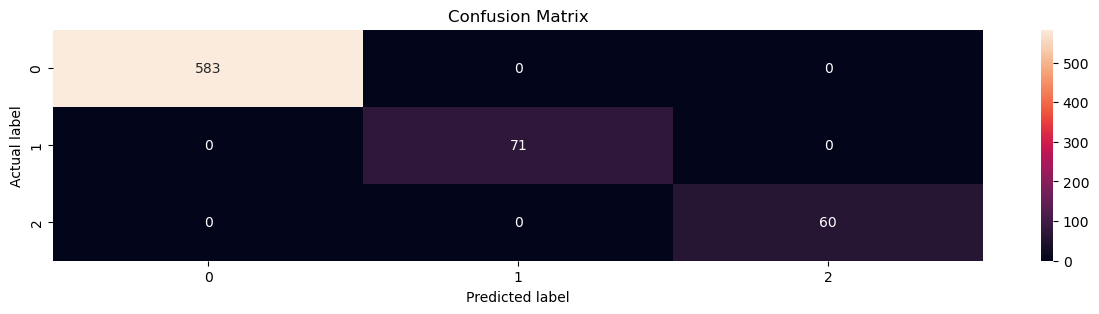

In [115]:
getConfusionMatrix(y_test, y_pred_svc)

In [96]:
getConfusionMatrix(y_test, y_pred_linear)

Confusion Matrix: 
 [[583   0   0]
 [  0  71   0]
 [  0   0  60]] 



## Determine the best model
Compare the accuracy score of the models and choose the best model

In [97]:
# to determine the model with the highest accuracy score
highest_accuracy = max(accuracy_svc, accuracy_linear)
for model in model_accuracy:
  if (model_accuracy[model] == highest_accuracy):
    best_model = model
best_model

SVC(kernel='linear', probability=True)

## Save Model

In [98]:
def saveModel(model):
  #set the file path to save the file, and also the filename to be saved
  #the model is saved as .sav file
  filepath = 'depression_indicator_model.sav'  # change to your own filepath

  #save the model using pickle.dump
  pickle.dump(model, open(filepath, 'wb'))
     

In [99]:
# save the model with higer accuracy score (in this case is svc)
saveModel(best_model)

## Load Model

In [100]:
def loadModel():
  #get the file path and also the filename to be loaded
  filepath = 'depression_indicator_model.sav'  # change to your own filepath

  #load the model using pickel.load
  loaded_model = pickle.load(open(filepath, 'rb'))
  return loaded_model

In [101]:
model = loadModel()

## Test Model